# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print(today)

03/21/22


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

In [5]:
print('------------------------')
print('Beginning Data Retrieval')     
print('------------------------')

#Building the query url:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Loop through the list of cities and perform a request for data on each:
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        index_counter = 0
        set_counter = 0
        if index_counter > 49:
            
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f'Processing Record {index_counter} of Set {set_counter} : {city}')
        
    except(KeyError, IndexError):
        print('City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 0 : rikitea
Processing Record 1 of Set 0 : mpika
Processing Record 1 of Set 0 : lebu
Processing Record 1 of Set 0 : bluff
Processing Record 1 of Set 0 : san luis
Processing Record 1 of Set 0 : hilo
Processing Record 1 of Set 0 : ponta delgada
Processing Record 1 of Set 0 : ribeira grande
Processing Record 1 of Set 0 : bredasdorp
Processing Record 1 of Set 0 : busselton
Processing Record 1 of Set 0 : waingapu
Processing Record 1 of Set 0 : alice springs
Processing Record 1 of Set 0 : port-gentil
Processing Record 1 of Set 0 : grindavik
Processing Record 1 of Set 0 : saint-philippe
Processing Record 1 of Set 0 : norman wells
Processing Record 1 of Set 0 : atuona
Processing Record 1 of Set 0 : praxedis guerrero
Processing Record 1 of Set 0 : jinchang
Processing Record 1 of Set 0 : east london
Processing Record 1 of Set 0 : new norfolk
Processing Record 1 of Set 0 : ushuaia
Processing Reco

Processing Record 1 of Set 0 : chernyshevskiy
Processing Record 1 of Set 0 : vaini
Processing Record 1 of Set 0 : griffith
Processing Record 1 of Set 0 : sisophon
Processing Record 1 of Set 0 : brodokalmak
City not found. Skipping...
Processing Record 1 of Set 0 : kaka
Processing Record 1 of Set 0 : faanui
Processing Record 1 of Set 0 : pacific grove
Processing Record 1 of Set 0 : fortuna
Processing Record 1 of Set 0 : port alfred
Processing Record 1 of Set 0 : moranbah
Processing Record 1 of Set 0 : alamosa
Processing Record 1 of Set 0 : flin flon
Processing Record 1 of Set 0 : husavik
Processing Record 1 of Set 0 : payo
Processing Record 1 of Set 0 : parabel
Processing Record 1 of Set 0 : stornoway
Processing Record 1 of Set 0 : guerrero negro
Processing Record 1 of Set 0 : moose factory
Processing Record 1 of Set 0 : ust-tsilma
Processing Record 1 of Set 0 : baykit
Processing Record 1 of Set 0 : ranong
City not found. Skipping...
Processing Record 1 of Set 0 : aklavik
Processing Rec

Processing Record 1 of Set 0 : baracoa
Processing Record 1 of Set 0 : whitehorse
Processing Record 1 of Set 0 : laramie
Processing Record 1 of Set 0 : salinopolis
Processing Record 1 of Set 0 : amapa
Processing Record 1 of Set 0 : los llanos de aridane
Processing Record 1 of Set 0 : deer lake
Processing Record 1 of Set 0 : duren
Processing Record 1 of Set 0 : san andres
Processing Record 1 of Set 0 : camopi
Processing Record 1 of Set 0 : vardo
Processing Record 1 of Set 0 : isla mujeres
Processing Record 1 of Set 0 : champerico
City not found. Skipping...
Processing Record 1 of Set 0 : pemberton
Processing Record 1 of Set 0 : sandy bay
Processing Record 1 of Set 0 : severo-yeniseyskiy
Processing Record 1 of Set 0 : comodoro rivadavia
Processing Record 1 of Set 0 : kulhudhuffushi
Processing Record 1 of Set 0 : prainha
Processing Record 1 of Set 0 : caravelas
Processing Record 1 of Set 0 : matadi
Processing Record 1 of Set 0 : warri
Processing Record 1 of Set 0 : marzuq
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Putting it into a pd DataFrame
weather_dictionary = pd.DataFrame({
                        'City': city_list,
                        'Cloudiness': cloudiness_list,
                        'Country': country_list,
                        'Date': date_list,
                        'Humidity': humidity_list,
                        'Lat': lat_list,
                        'Lng': lng_list,
                        'Max Temp': max_temp_list,
                        'Wind Speed': wind_speed_list
})

In [7]:
#
weather_dictionary.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [8]:
weather_dictionary

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,1,PF,1647844974,73,-23.1203,-134.9692,79.84,14.16
1,Mpika,100,ZM,1647844975,94,-11.8343,31.4529,61.97,7.65
2,Lebu,47,CL,1647844976,92,-37.6167,-73.6500,55.96,4.36
3,Bluff,10,NZ,1647844976,85,-46.6000,168.3333,60.48,14.74
4,San Luis,0,AR,1647844977,55,-33.2950,-66.3356,55.62,9.46
...,...,...,...,...,...,...,...,...,...
543,Mehamn,100,NO,1647845353,56,71.0357,27.8492,42.71,34.31
544,Iralaya,100,HN,1647845354,81,15.0000,-83.2333,77.59,13.09
545,Conde,100,BR,1647845354,94,-7.2597,-34.9075,76.46,3.44
546,Yuncheng,100,CN,1647845355,54,35.0231,110.9928,55.20,2.75


In [9]:
weather_dictionary.to_csv('exported_data/cities_part_1.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
#Creating a python list of booleans with a for loop to test the >100 humidity.

booleans = []
for length in weather_dictionary.Humidity:
    if length >100:
        booleans.append(True)
    else:
        booleans.append(False)

In [11]:
#  Get the indices of cities that have humidity over 100%.
booleans[0:10]

[False, False, False, False, False, False, False, False, False, False]

In [12]:
len(booleans)

548

In [13]:
is_high_humid = pd.Series(booleans)

In [14]:
is_high_humid.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [15]:
#Confirming cities with humidity with greater than 100%
weather_dictionary[is_high_humid]
#Result at the time of running code shows no cities with humidity with >100%

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

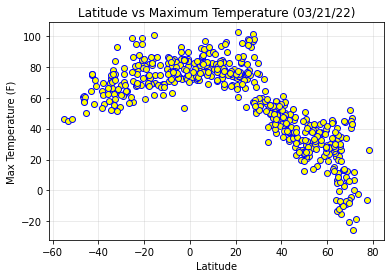

In [16]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dictionary['Lat'], weather_dictionary['Max Temp'], facecolor = 'yellow', edgecolor = 'blue')

#Setting the title
plt.title('Latitude vs Maximum Temperature (03/21/22)')
          
#Set x axis label
plt.xlabel('Latitude')
          
#Set y axis label
plt.ylabel('Max Temperature (F)')

#Applying the grid lines
plt.grid(linestyle='-', linewidth=1, alpha =0.25)
          
plt.show()

In [17]:
#^^It can be seen that close to zero latitude (or closer to the equator) would usually result in higher temperatures.^^

## Latitude vs. Humidity Plot

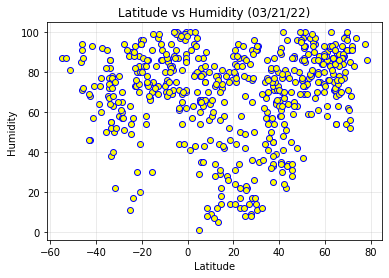

In [18]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dictionary['Lat'], weather_dictionary['Humidity'], facecolor = 'yellow', edgecolor = 'blue')


#Setting the title
plt.title('Latitude vs Humidity (03/21/22)')

#Set x axis label
plt.xlabel('Latitude')
          
#Set y axis label
plt.ylabel('Humidity')

#Applying the grid lines
plt.grid(linestyle='-', linewidth=1, alpha =0.25)

plt.show()

In [19]:
#It can be seen that those cities which are located further away from the equator are likely to have higher humidity.

## Latitude vs. Cloudiness Plot

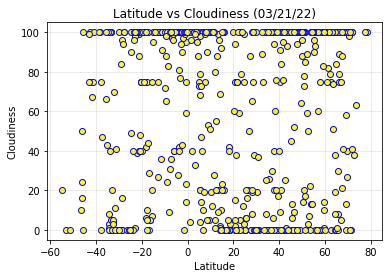

In [20]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dictionary['Lat'], weather_dictionary['Cloudiness'], facecolor = 'yellow', edgecolor = 'blue')

#Setting the title
plt.title('Latitude vs Cloudiness (03/21/22)')

#Set x axis label
plt.xlabel('Latitude')
          
#Set y axis label
plt.ylabel('Cloudiness')

#Applying the grid lines
plt.grid(linestyle='-', linewidth=1, alpha =0.25)

plt.show()

In [21]:
#^^Cloudiness is spread across various cities from various latitude.^^

## Latitude vs. Wind Speed Plot

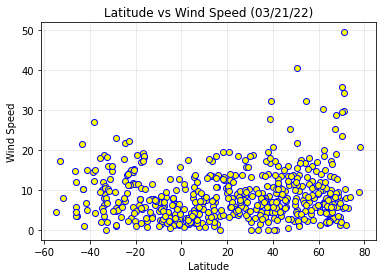

In [22]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dictionary['Lat'], weather_dictionary['Wind Speed'], facecolor = 'yellow', edgecolor = 'blue')

#Setting the title
plt.title('Latitude vs Wind Speed (03/21/22)')

#Set x axis label
plt.xlabel('Latitude')
          
#Set y axis label
plt.ylabel('Wind Speed')

#Applying the grid lines
plt.grid(linestyle='-', linewidth=1, alpha =0.25)

plt.show()

In [23]:
#Wind speed is also spread across latitude.

## Linear Regression

In [24]:
#Creating the seapration for northern and southern hemispheres
northern = weather_dictionary.loc[weather_dictionary['Lat'] >= 0]
northern.reset_index(inplace=True)

southern = weather_dictionary.loc[weather_dictionary['Lat'] < 0]
southern.reset_index(inplace=True)


In [25]:
#Define function for creating linear regression and scatter plot
def plot_linear_regression(xdata, ydata, xlab, ylab, labelposition, fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata,ydata)
    print(f'The r-squared is: {rvalue}')
    regress_values = xdata * slope + intercept
    line_equat = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept, 2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata, regress_values,'r-')
    plt.annotate(line_equat, labelposition, fontsize = 14, color = 'black')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8862968887119457


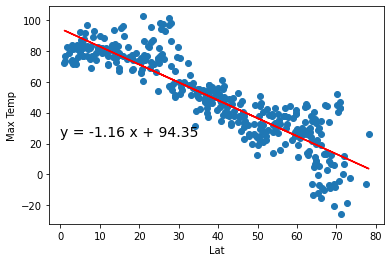

In [26]:
xlab = 'Lat'
ylab = 'Max Temp'
labelposition = (0,25)
plot_linear_regression(northern[xlab], northern[ylab], xlab, ylab, labelposition, 5)

In [27]:
#There is a strong negative correlation between latitude and maximum temperatures in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5251849672402338


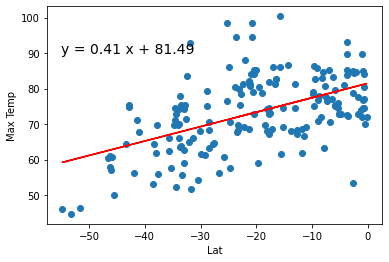

In [28]:
xlab = 'Lat'
ylab = 'Max Temp'
labelposition = (-55,90)
plot_linear_regression(southern[xlab], southern[ylab], xlab, ylab, labelposition, 6)

In [29]:
#There is a moderate positive correlation between latitude and maximum temperatures in the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3866632504886479


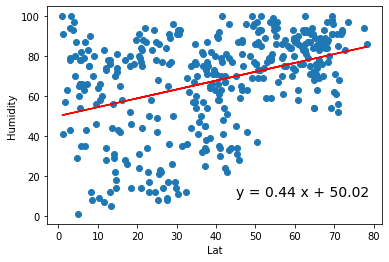

In [30]:
xlab = 'Lat'
ylab = 'Humidity'
labelposition = (45,10)
plot_linear_regression(northern[xlab], northern[ylab], xlab, ylab, labelposition, 7)

In [31]:
#There is a moderate positive correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24260011714818244


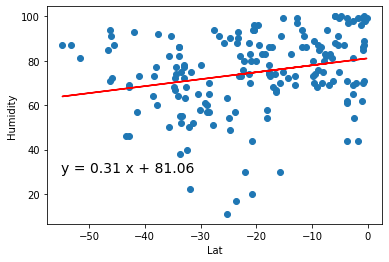

In [32]:
xlab = 'Lat'
ylab = 'Humidity'
labelposition = (-55,30)
plot_linear_regression(southern[xlab], southern[ylab], xlab, ylab, labelposition, 8)

In [33]:
#There is a weak positive correlation between latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16124242778362555


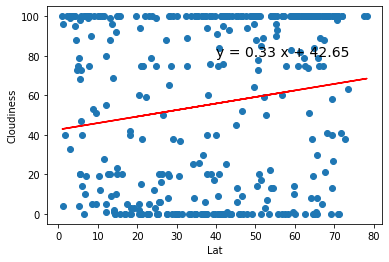

In [34]:
xlab = 'Lat'
ylab = 'Cloudiness'
labelposition = (40,80)
plot_linear_regression(northern[xlab], northern[ylab], xlab, ylab, labelposition, 9)

In [35]:
#There is a weak positive correlation between latitude and cloudiness for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3497387867454542


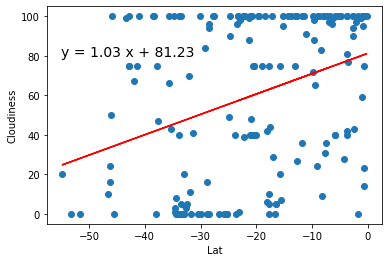

In [36]:
xlab = 'Lat'
ylab = 'Cloudiness'
labelposition = (-55,80)
plot_linear_regression(southern[xlab], southern[ylab], xlab, ylab, labelposition, 10)

In [37]:
#There is a moderate positive correlation between latitude and cloudiness for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2062026162402548


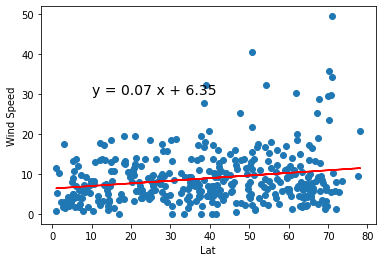

In [38]:
xlab = 'Lat'
ylab = 'Wind Speed'
labelposition = (10,30)
plot_linear_regression(northern[xlab], northern[ylab], xlab, ylab, labelposition, 11)

In [39]:
#There is a weak positive correlation between latitude and wind speed for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3248125394295851


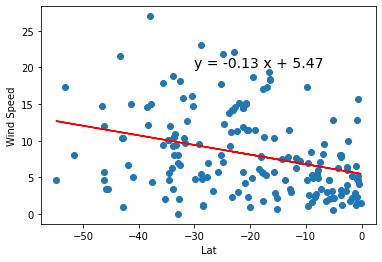

In [40]:
xlab = 'Lat'
ylab = 'Wind Speed'
labelposition = (-30,20)
plot_linear_regression(southern[xlab], southern[ylab], xlab, ylab, labelposition, 12)

In [41]:
#There is a moderate negative correlation between latitude and wind speed for the southern hemisphere.